<a href="https://colab.research.google.com/github/FelixQLe/FelixQLe/blob/main/Develop_a_decent_workflow_to_pre_approve_Loan_using_Flask_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Instruction on how to develop a pipeline model includes features transformation combine predictive model, and deploy on web app framework using Flask python

In this tutorial, you will know:
* How to develop Hypotheses for EDA(Explore Data Analysis)
* how to use function transformer to transform features functions are used for pipeline's features tranformation
* how to use pickle, save and load model when needed
* how to deploy model on web app framework using Flask python

### Tutorial Overview

This tutorial is divided into six parts, they are:


1. Hypotheses generation
2. Initial cleaning
3. EDA(Explore Data Analysis)
4. Feature Engineering
5. Develop Pipeline models
6. deploy model on Flask app

INTRO: The pre-approval Loan problem uses data which is online applications form are being filled by customer, and the customer will get back the Loan decision immediately


### Dataset

The data is applicants informations are provided as online application forms are being filled. Here is the link to https://github.com/FelixQLe/mini-project-4/blob/master/data/data.csv


Customer will fill in informations includes the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well.

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)


##### Load dataset

In [ ]:
import pandas as pd

#loading dataset
df = pd.read_csv("data/data.csv")

### 1. Hypotheses Generation

Hypotheses is important step to understand the our data featuates. Its important to generate every hypothesis for every feature in our data, to see how important each feature is. 

The solely purpose of this tutorial is how to develop a decent workflow that you can apply on different problems, therefore in this tutorial I only generate hypotheses on some features.

To get a score, you need to realy understand the data that you can generate other features to add to original data which will help increase the predictive power


1. Applicants having a credit history more likely get approval, vice-versa. Credit history showing reliable informations of applicants income, spending and saving.


2. Applicants with higher applicantincome and co-applicantincome has more more likely get approval. Income is evidently showing their ability to pay back their loan.


3. Applicants graduated is likely to be considered to Loan status decision. applicants  graduated is likely to get higher income and secure job which is showing their ability to pay back their loan soon.


4. Semiurbun applicants has higher change to get approval, they are in high growth perspectives.


5. Applicants with self_employed are likely to get approval. If they own a business. For those self_employed they will have high income.


6. Applicants have more dependants likely get refused to loan decision. They have to spend more than other groups.

### 2. Initial Cleaning

There are some type of treatments to null value. for the purpose of this tutorial, I will using simple mean, median, mode to fill in null value, you can use some other advance techniques to to improve data and improve predictive power 

#### Investigate data

In [ ]:
#missing values percentages
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Null treatments
* Gender will be filled with mode()
* Credit_history use median()
* Loan_Amount missing values, I will use mean()
* Self_employed will be filled with No
* Dependencies will be filled with mode()
* fillna Married with mode()
* Load_Amount_Term will fill NaN with median()

In [ ]:
#fillna technique
df['Gender'].fillna(df['Gender'].mode().iloc[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0], inplace=True)
df['LoanAmount'].fillna(float(round(df['LoanAmount'].mean(), 0)), inplace=True)
df['Self_Employed'].fillna("No", inplace=True)
df['Dependents'].fillna(df['Dependents'].mode().iloc[0], inplace=True)
df['Married'].fillna(df['Married'].mode().iloc[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
#df["value"] = df.groupby("name").transform(lambda x: x.fillna(x.mean()))
df['LoanAmount'] = df['LoanAmount'].astype(int)

In [ ]:
#checking missing values again
df.isnull().sum()/len(df)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

### 3. Data Exploration Analysis (EDA)
EDA is where we prove our hypotheses are true or not, and show how importance of each feature is to our model

Let's do some basic data exploration here and come up with some inferences about the data. I will try to figure out some irregularities and address them in the next section.

##### 3.1 Semiurbun applicants has higher change to get approval, they are in high growth perspectives.

In [ ]:
#seperate areas
urban_df = df[df['Property_Area'] == 'Urban']
rural_df = df[df['Property_Area'] == 'Rural']
semi_df = df[df['Property_Area'] == 'Semiurban']

In [ ]:
#ratio between approved and not approved applicants in Urban
print("Applicants living in urban area got approved: {}%".format(
      round(len(urban_df[urban_df['Loan_Status'] == 'Y'])/len(urban_df), 2)))
print("Applicants living in urban area got disapproved: {}%".format(
      round(len(urban_df[urban_df['Loan_Status'] == 'N'])/len(urban_df), 2)))

Applicants living in urban area got approved: 0.66%
Applicants living in urban area got disapproved: 0.34%


* This is not what i expected, the applicants got approved double the disapproved applicants. Lets see the other areas

In [ ]:
#ratio between approved and not approved applicants in Rural
print("Applicants living in rural area got approved: {}%".format(
      round(len(rural_df[rural_df['Loan_Status'] == 'Y'])/len(rural_df), 2)))
print("Applicants living in rural area got disapproved: {}%".format(
      round(len(rural_df[rural_df['Loan_Status'] == 'N'])/len(rural_df), 2)))

Applicants living in rural area got approved: 0.61%
Applicants living in rural area got disapproved: 0.39%


* Rural and Urban approval ratio are almost the same

In [ ]:
#ratio between approved and not approved applicants Semi-urban
print("Applicants living in urban area got approved: {}%".format(
      round(len(semi_df[semi_df['Loan_Status'] == 'Y'])/len(semi_df), 2)))
print("Applicants living in urban area got disapproved: {}%".format(
      round(len(semi_df[semi_df['Loan_Status'] == 'N'])/len(semi_df), 2)))

Applicants living in urban area got approved: 0.77%
Applicants living in urban area got disapproved: 0.23%


As I expected, The percentage of applicants living in semi-urban got approved are higher than the other areas, also the percentage of applicants got disapproved are significantly lower than the other areas.

conclusion, semi-urban applicants has higher change to get approval, they are in high growth perspectives.

##### 3.2 Applicants having a credit history more likely get approval, vice-versa. Credit history showing reliable informations of applicants income, spending and saving.

In [ ]:
#Lets see How many applicants have a `Credit_History`
total_rows = len(df['Credit_History'])
total_no_hist = df.groupby('Credit_History')['Credit_History'].count().iloc[0]
total_yes_hist = df.groupby('Credit_History')['Credit_History'].count().iloc[1]
prop_no_hist = (total_no_hist/total_rows)*100
prop_yes_hist = (total_yes_hist/total_rows)*100

print(f' The total number of no history score is {total_no_hist}, \
        which is {prop_no_hist:.2f}% of the total applicants')
print(f' The total number of yes history score is {total_yes_hist}, \
      which is {prop_yes_hist:.2f}% of the total applicants')

 The total number of no history score is 89,         which is 14.50% of the total applicants
 The total number of yes history score is 525,       which is 85.50% of the total applicants


In [ ]:
#extract df credit history 
df_no_credit = df[df['Credit_History'] == 0.0]
df_yes_credit = df[df['Credit_History'] == 1.0]

In [ ]:
#ratio of applicants loan status with no credit history score
print("Applicants without credit history score get approval: {}%".format(
      round(len(df_no_credit[df_no_credit['Loan_Status'] == 'Y'])/len(df_no_credit), 2)))
print("Applicants without credit history score got disproval: {}%".format(
      round(len(df_no_credit[df_no_credit['Loan_Status'] == 'N'])/len(df_no_credit), 2)))

Applicants without credit history score get approval: 0.08%
Applicants without credit history score got disproval: 0.92%


In [ ]:
#ratio of applicants loan status with credit history score
print("Applicants with credit history score get approval: {}%".format(
      round(len(df_yes_credit[df_yes_credit['Loan_Status'] == 'Y'])/len(df_yes_credit), 2)))
print("Applicants with credit history score got disproval: {}%".format(
      round(len(df_yes_credit[df_yes_credit['Loan_Status'] == 'N'])/len(df_yes_credit), 2)))

Applicants with credit history score get approval: 0.79%
Applicants with credit history score got disproval: 0.21%


we can conclude that applicants having a credit history more likely get approval, vice-versa

I kept using the the same technique above to work on the other 4 hypotheses. you can see more in this link to my Git https://github.com/FelixQLe/mini-project-4

You can practice on your own work with them later, even add more hypotheses.

Lets move on the next step...

In [ ]:
# Loan status will return 0 or 1 instead of Y or N
df['Loan_Status'] = np.where(df['Loan_Status'] == 'N', 0, 1)

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [ ]:
# add a Total_Income column which add applicantincome and co-applicantincome

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome'] #ApplicantIncome + CoapplicantIncome
df = df.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'Loan_ID'])

In [ ]:
# save csv cleaned data
df.to_csv("data/cleaned_data.csv")

### 4. Feature Engineering

#### The following feature engineering is based on EDA, make sure you complete previous step to better understand these FE
* Gender and Married, Self_Employed, Education, will be 0 and 1
* Loan amount term will be in term of year, Model will treat it as level when perform prediction
* I will use Total_Income for ApplicantIncome and CoapplicantIncome
* Loan_status, I will use Label encoder, this is target
* Property_Area I will use Labelencoder, It is easy for Model to treat them as level

In [ ]:
#import packages
import numpy as np

#df = df.drop(columns='Loan_ID')

#Gender and Married, Self_Employed, Education
df['Gender'] = np.where(df['Gender'] == 'Male', 0, 1)
df['Married'] = np.where(df['Married'] == 'No', 0, 1)

# Self_Employed has no power of prediction, but I will keep it for now
df['Self_Employed'] = np.where(df['Self_Employed'] == 'No', 0, 1)

df['Education'] = np.where(df['Education'] == 'Not Graduate', 0, 1)

In [ ]:
# Load_Amount_Term

df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12
df['Loan_Term_Year'] = df['Loan_Amount_Term'].astype(int)
df.drop(columns=['Loan_Amount_Term'], inplace=True)

In [ ]:
# Dependents

col         = 'Dependents'
conditions  = [df[col] == '0', df[col] == '3+']
choices     = ['0','2']
    
#df["Dependents"] = np.select(conditions, choices, default='1')

In [ ]:
#checking unique value in dependency column
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

#### Log transform LoanAmount and Total_Income
* this perfoming will ensure our numeric cols in normal distribution

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <BarContainer object of 10 artists>)

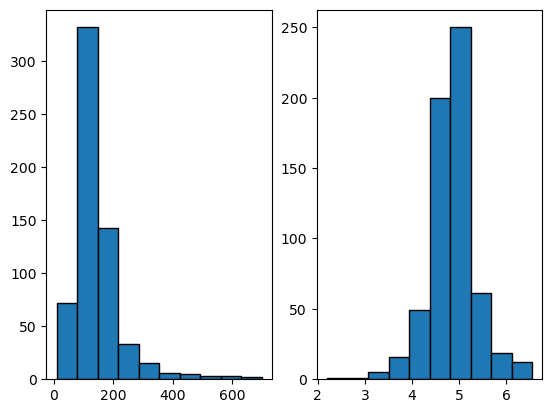

In [ ]:
import matplotlib.pyplot as plt

LoanAmount_log = np.log(df['LoanAmount'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df['LoanAmount'], edgecolor='black')
axs[1].hist(LoanAmount_log, edgecolor='black')

#### ApplicantIncome and CoApplicantIncome
Applicants with higher applicantincome and co-applicantincome has more more likely get approval. Income is evidently showing their ability to pay back their loan. A total_income column will have more power of prediction

In [ ]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Term_Year
0,0,0,0,1,0,146,1.0,Urban,1,5849.0,30
1,0,1,1,1,0,128,1.0,Rural,0,6091.0,30
2,0,1,0,1,1,66,1.0,Urban,1,3000.0,30
3,0,1,0,0,0,120,1.0,Urban,1,4941.0,30
4,0,0,0,1,0,141,1.0,Urban,1,6000.0,30


(array([  7.,  53., 186., 205.,  91.,  41.,  20.,   4.,   5.,   2.]),
 array([ 7.27378632,  7.67662813,  8.07946994,  8.48231175,  8.88515356,
         9.28799538,  9.69083719, 10.093679  , 10.49652081, 10.89936262,
        11.30220443]),
 <BarContainer object of 10 artists>)

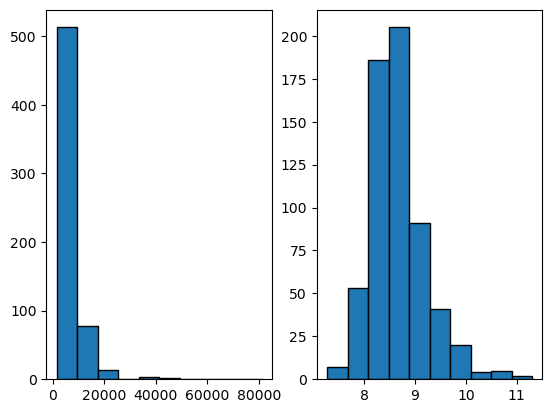

In [ ]:
TotalIncome_log = np.log(df['Total_Income'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df['Total_Income'], edgecolor='black')
axs[1].hist(TotalIncome_log, edgecolor='black')

Note: All FEATURE ENGINEERING will be performed in pipeline, feature transformation

### 5. Develop Pipeline models

In [ ]:
#loading packages
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin

from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

#To display our model diagram
from sklearn import set_config
set_config(display='diagram')


import pickle

In [ ]:
#Load cleaned_data
df = pd.read_csv("data/cleaned_data.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,146,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,141,360.0,1.0,Urban,1,6000.0


In [ ]:
#split dataset
X, y = df.drop(columns='Loan_Status'), df['Loan_Status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=87)

In [ ]:
#Log function
def log_transform(x):
    return np.log(x + 1)

#Loan function    
def Loan_term(X):
    X = X/12
    return X.astype(int)

#Depedents function
def Dependents_transform(X):
    col = 'Dependents'
    conditions  = [X == '0', X == '3+']
    
    X = np.select(conditions, [0,2], default=1)
    
    return X
#Label encoder functions
class CustomLabelEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X ,y=None):
        le=LabelEncoder()
        for i in X[label_cols]:
            X[i]=le.fit_transform(X[i])
        return X

###### Note: 
A function can not use in Pipeline, instead we have to create a Class objects includes 'fit' function and 'transform' function, to be able to use in Pipeline. 

I will use FunctionTransformer to transform our function to being use in our Pipelines. This is is simple way.

In [ ]:
#extract columns
label_cols     = ['Gender','Married', 'Self_Employed', 'Education', 'Property_Area']
log_scale_cols = ['LoanAmount', 'Total_Income']
depep_cols     = ['Dependents']
loan_cols      = ['Loan_Amount_Term']

In [ ]:
#lb = ModifiedLabelEncoder()
log_transformer = FunctionTransformer(log_transform)
loan_transformer = FunctionTransformer(Loan_term)
dependents_transformer = FunctionTransformer(Dependents_transform)
sc = StandardScaler()

In [ ]:
# Preprocessing pipeline, include all features transform
num_pipe = Pipeline([
  ('log_feats', log_transformer),
  ('scaler', sc)
])


cols_transform = ColumnTransformer([
    ('num_transform', num_pipe, log_scale_cols),
    ('dependents_transforme', dependents_transformer, depep_cols),
    ('loan_transform', loan_transformer, loan_cols),
    ('label_encoder', CustomLabelEncode(), label_cols)
],remainder='passthrough')


feature_union = FeatureUnion([('pca', PCA()),
                              ('select_best', SelectKBest(k=4))])

In [ ]:
#create main pipeline steps
main_pipeline = Pipeline(steps=[('preprocessing', cols_transform),
                                ('features', feature_union),
                                ('classifier', RidgeClassifier())])

# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'classifier__alpha': [0.001, 0.002, 0.003, 0.01, 0.1], 
              'features__pca__n_components': [3,5,7],
              'features__select_best__k': [1,2,3,4,6]}

grid = GridSearchCV(main_pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)


best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy:\n\t {best_acc}\nAchieved with hyperparameters:\n\t {best_hyperparams}')

Best test set accuracy:
	 0.8
Achieved with hyperparameters:
	 {'classifier__alpha': 0.001, 'features__pca__n_components': 3, 'features__select_best__k': 1}


In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transform',
                                                                         Pipeline(steps=[('log_feats',
                                                                                          FunctionTransformer(func=<function log_transform at 0x17ee49280>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LoanAmount',
                                                                          'Total_Income']),
                                                                        ('dependents_transforme',
                                                                         FunctionTransformer(func=<function Dep...
                                                                         CustomLabelEncode(),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Self_Employed',
                                                                          'Education',
                                                                          'Property_Area'])])),
                                       ('features',
                                        FeatureUnion(transformer_list=[('pca',
                                                                        PCA()),
                                                                       ('select_best',
                                                                        SelectKBest(k=4))])),
                                       ('classifier', RidgeClassifier())]),
             param_grid={'classifier__alpha': [0.001, 0.002, 0.003, 0.01, 0.1],
                         'features__pca__n_components': [3, 5, 7],
                         'features__select_best__k': [1, 2, 3, 4, 6]})

In [ ]:
grid.score(X_test, y_test)

0.8

##### Note: This score is the outcome of simple feature engineering and model. There are many way to improve this accuracy score, you can figure it out

#### Save model using Pickle

In [ ]:
# saving the model
import pickle

pickle.dump(grid, open('/Users/hople/Desktop/Bootcamp Lectures/mini-project-4/Model_Pickle/credit_classifier.pkl',
                       'wb'))

### 6. Deploy model on Flask app

In this step, we’ll make a web application inside a Python file and run it to start the server, which will receive applicants informations includes customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and this web app will return pre-approval decision.

##### Creating a Base Application
Note: Base application has to be written in raw python enviroment. Visual Studio Code is a powerful tools supports different languages. You also can use notebook to create app.py, but I highly recommend create app.py on Visual Studio Code or other tools, such as Atom..

* below is how I create app framework run on web, do not copy and past, try to type it.

In [ ]:
from flask import render_template, request, jsonify,Flask
import flask

# We need load all the python packages we use in previous sections here
import numpy as np
import traceback #allows you to send error to user
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin

from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
##############################


# App definition
app = Flask(__name__)

#extract columns as previous sections
#because our Pickle will load pipeline models which uses this columns for feature transformations 
label_cols = ['Gender','Married', 'Self_Employed', 'Education', 'Property_Area']
log_scale_cols = ['LoanAmount', 'Total_Income']
depep_cols = ['Dependents']
loan_cols = ['Loan_Amount_Term']

# The same reason, we also need all functions we define in previous sections as well in this app.py file
def log_transform(x):
    return np.log(x + 1)
    
def Loan_term(X):
    X = X/12
    return X.astype(int)

def Dependents_transform(X):
    col = 'Dependents'
    conditions  = [X == '0', X == '3+']
    
    X = np.select(conditions, [0,2], default=1)
    
    return X

class CustomLabelEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X ,y=None):
        le=LabelEncoder()
        for i in X[label_cols]:
            X[i]=le.fit_transform(X[i])
        return X

# importing pickle file we saved , our predictive models was serialized in this file
with open('/Users/hople/Desktop/Bootcamp Lectures/mini-project-4/Model_Pickle/credit_classifier.pkl', 'rb') as f:
   credit_predict = pickle.load(f)

#webpage with two methods, POST and GET
@app.route('/')
def welcome():
   return "Welcome! Use this Flask App for Credit pre-determination"

@app.route('/predict', methods=['POST','GET'])
def predict():

   if flask.request.method == 'GET':
       return "Prediction page. Try using post with params to get specific prediction. \
                                   Format data to pandas dataframe"
                

   if flask.request.method == 'POST':
       try:
           json_ = request.json # '_' since 'json' is a special word
           print(json_)
           query_pd = pd.DataFrame(json_)
           prediction = list(credit_predict.predict(query_pd))
            
           #return 0: No, 1, Yes
           return jsonify({
               "prediction":str(prediction)
           })

       except:
           return jsonify({
               "trace": traceback.format_exc()
               })



if __name__ == "__main__":
   app.run()

1. Open Terminal
2. go to working directory, containing the app.py
3. run python app.py

* You will see the following lines

![Screen%20Shot%202022-09-26%20at%2011.12.49%20AM.png](attachment:Screen%20Shot%202022-09-26%20at%2011.12.49%20AM.png)


4. When you go to the local address above, you will see "Welcome! Use this Flask App for Credit pre-determination"

#### Create POST request
##### note: 
GET Method: Data is requested from a specific resource. 

POST request submit the data to be processed to a specific resource, and send back messages. By default, they don’t have any maximum length.
      
Here we need to submit json file include applicants information, 

Here is an example of how to create POST request python file to send to our web app and get result

In [ ]:
## Python test file for flask to test locally
import requests as r
import pandas as pd
import json


base_url = 'http://127.0.0.1:5000/' #base url local host


json_data = [
    {
    "Gender" : "Male",
    "Married" : "Yes",
    "Dependents" : "3+",
    "Education" : "Not Graduate",
    "Self_Employed" : "No",
    "LoanAmount" : 70,
    "Loan_Amount_Term" : 180.0,
    "Credit_History" : 0,
    "Property_Area" : "Urban",
    "Total_Income" : 4611,
    }
]

# POST Response
response = r.post(base_url + "predict", json = json_data)


if response.status_code == 200:
    print('...')
    print('request successful')
    print('...')
    print(response.json())
else:
    print(response.json())
    print('request failed')

...
request successful
...
{'prediction': '[0]'}
